In [ ]:
import pandas as pd
import sklearn as sk
import scipy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, normalize 
from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score,plot_confusion_matrix,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report




In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# train = pd.read_csv('./data/exoTrain.csv')

# test = pd.read_csv('./data/exoTest.csv')

from google.colab import drive 
drive.mount('/content/gdrive')


train = pd.read_csv('gdrive/My Drive/exoTrain.csv')
test = pd.read_csv('gdrive/My Drive/exoTest.csv')



In [ ]:
train.head()

In [ ]:
# visualizing non-exoplanet-stars
fig = plt.figure(figsize=(15,40))
x = np.array(range(3197))
for i in range(10):
    ax = fig.add_subplot(14,4,i+1)
    ax.plot(x,train[train.LABEL == 1].iloc[i,1:])





In [ ]:
# visualizing exoplanet-stars: trend over time is approximately periodic and outliers are present
fig = plt.figure(figsize=(15,40))
x = np.array(range(3197))
for i in range(10):
    ax = fig.add_subplot(14,4,i+1)
    ax.plot(x,train[train.LABEL == 2].iloc[i,1:])


In [ ]:
# visualizing flux distribution of non-exoplanet-stars: narrower distribution b/c flux values are more consistent
fig = plt.figure(figsize=(15,40))
for i in range(20):
    ax = fig.add_subplot(14,4,i+1)
    train[train.LABEL ==1].iloc[i,1:].hist(bins=60)


In [ ]:
# visualizing flux distribution of exoplanet-stars: wider distribution b/c flux values vary more 
fig = plt.figure(figsize=(15,40))
for i in range(20):
    ax = fig.add_subplot(14,4,i+1)
    train[train.LABEL ==2].iloc[i,1:].hist(bins=60)

In [ ]:
from sklearn.model_selection import train_test_split

y_train = train['LABEL']
X_train = train[train.columns[1:]]

y_test = test['LABEL']
X_test = test[train.columns[1:]]
print('LABEL' not in X_train.columns) ## check that we didn't include the labels
print('LABEL' not in X_test.columns) ## check that we didn't include the labels

In [ ]:
# train split
y_train.value_counts()

In [ ]:
# baseline model w/o any processing
from sklearn import svm
svm = svm.SVC(kernel = 'rbf')
svm.fit(X_train,y_train)
preds = svm.predict(X_test)
print(classification_report(y_test,preds))

In [ ]:
preds_train = svm.predict(X_train)
print(classification_report(y_train,preds_train))

In [ ]:
# we will do a heavy amount of feature engineering

In [ ]:
y_test.value_counts()

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
oversample = SMOTE()
X_sampled, y_sampled = oversample.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_sampled)
print(counter)

In [ ]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X_sampled)
X_embedded.shape

In [ ]:
plt.figure(figsize = (20,10))
plt.title('TSNE reduction with SMOTE')
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y_sampled)
plt.colorbar()
plt.grid()
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
# one can clearly identify the positive samples generated by SMOTE in the tsne reduction

In [ ]:
# separate model with processing
from sklearn import svm
svm = svm.SVC(kernel = 'rbf', probability = True)
svm.fit(X_sampled,y_sampled)
preds = svm.predict(X_test)
print(classification_report(y_test,preds))

In [ ]:
preds_train = svm.predict(X_sampled)
print(classification_report(y_sampled,preds_train))

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(svm, X_test, y_test)

In [ ]:
subset = X_sampled[y_sampled==2]
probs = svm.predict_proba(subset)

In [ ]:
plt.figure(figsize = (20,10))

plt.scatter(list(range(0,probs.shape[0])), probs[:,1])
plt.axhline(0.5, color = 'r')
plt.ylim(0.4,0.6)
plt.title('Probabilities for True class (Training Set)')
plt.ylabel('Prediction')
plt.xlabel('Sample Number')
plt.grid()

In [ ]:
subset = X_test[y_test==2]
probs = svm.predict_proba(subset)
plt.figure(figsize = (20,10))

plt.scatter(list(range(0,probs.shape[0])), probs[:,1])
plt.axhline(0.5, color = 'r')
plt.ylim(0.4,0.6)
plt.title('Probabilities for True class (Test Set)')
plt.ylabel('Prediction')
plt.xlabel('Sample Number')
plt.grid()

In [ ]:
test_probs = svm.predict_proba(X_test)

In [ ]:
test_preds = [2 if test_probs[i,1]>0.470 else 1 for i in range(0,len(test_probs))]
test_preds2= [2 if test_probs[i,1]>0.475 else 1 for i in range(0,len(test_probs))]
test_preds3 = [2 if test_probs[i,1]>0.485 else 1 for i in range(0,len(test_probs))]

Counter(test_preds)

In [ ]:
print(classification_report(y_test,test_preds))
print(classification_report(y_test,test_preds2))
print(classification_report(y_test,test_preds3))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

plt.figure(figsize = (10,7))
cm = confusion_matrix(y_test, test_preds)
sn.heatmap(cm, annot=True)


plt.figure(figsize = (10,7))
cm = confusion_matrix(y_test, test_preds2)
sn.heatmap(cm, annot=True)

plt.figure(figsize = (10,7))
cm = confusion_matrix(y_test, test_preds3)
sn.heatmap(cm, annot=True)

In [ ]:
# signal processing
from scipy import fftpack

fs = 3
sample = X_sampled.iloc[1000] 
fft_wave = np.fft.fft(sample)

# Compute the Discrete Fourier Transform sample frequencies.

fft_fre = np.fft.fftfreq(n=sample.shape[0], d=1/fs)

In [ ]:
plt.plot(fft_fre, fft_wave.real, label="Real part")

plt.legend(loc=1)
plt.title("FFT in Frequency Domain")

In [ ]:
yf = fftpack.fft(sample.values, len(sample))

amp = np.abs(yf) # get amplitude spectrum 
freq = np.linspace(0.0, 1.0/(2.0*(6/500)), len(sample)//2) # get freq axis

# plot the amp spectrum

plt.figure(figsize=(10,6))
plt.plot(freq, (2/amp.size)*amp[0:amp.size//2])
plt.show()

In [ ]:
from scipy.signal import detrend

def remove_noise(data):
    import scipy.signal as signal
    N  = 3    
    Wn = 0.15
    B, A = signal.butter(N, Wn, output='ba')
    smooth_data = signal.filtfilt(B,A, data)
    return smooth_data

In [ ]:
X_sampled = pd.DataFrame(X_sampled)

In [ ]:
from scipy.signal import butter,filtfilt
from scipy import signal
import matplotlib.pyplot as plt

def apply_bandpass(sig):
    # Filter requirements.
    fs = 30.0       # sample rate, Hz
    T = len(sig)/fs       # Sample Period
    cutoff = [0.1, 2.5] #0.3-0.45 for resting
    nyq = 0.5 * fs  # Nyquist Frequency
    order = 2  # sin wave can be approx represented as quadratic
    n = int(T * fs) # total number of samples
    def butter_bandpass_filter(data, cutoff, fs, order):
       # normal_cutoff = cutoff / nyq
        # Get the filter coefficients 
        b, a = butter(order, [cutoff[0]/nyq, cutoff[1]/nyq], btype='bandpass', analog=False)
        y = filtfilt(b, a, data)
        return y
    y = butter_bandpass_filter(sig, cutoff, fs, order)
    return signal.detrend(y)

In [ ]:
t1 = apply_bandpass(X_sampled.iloc[12].values)

plt.figure(figsize = (15,10))
plt.plot(signal.detrend(t1), label = 'filtered')
plt.plot(X_sampled.iloc[0].values-450, label = 'original')
plt.legend()
plt.grid()
plt.title('Bandpass Filtering, label = {}'.format(str(y_sampled[12])))

In [ ]:
t1 = apply_bandpass(X_sampled.iloc[230].values)

plt.figure(figsize = (15,10))
plt.plot(signal.detrend(t1), label = 'filtered')
plt.plot(X_sampled.iloc[0].values, label = 'original')
plt.legend()
plt.grid()
plt.title('Bandpass Filtering, label = {}'.format(str(y_sampled[230])))

In [ ]:
idx = 5950
t1 = apply_bandpass(X_sampled.iloc[idx].values)

plt.figure(figsize = (15,10))
plt.plot(signal.detrend(t1), label = 'filtered')
plt.plot(X_sampled.iloc[0].values-450, label = 'original')
plt.legend()
plt.grid()
plt.title('Bandpass Filtering, label = {}'.format(str(y_sampled[idx])))

In [ ]:
X_sampled.head()

In [ ]:
X_new_sampled = X_sampled.apply(apply_bandpass, axis = 1)
X_new_test = X_test.apply(apply_bandpass, axis = 1)


In [ ]:
plt.figure(figsize = (15,10))
idx = 7670
plt.plot(X_sampled.iloc[idx].values, label = 'original')
plt.plot(X_new_sampled.iloc[idx]-150, label = 'filtered')
plt.legend()
plt.grid()
plt.title('Bandpass Filtering, label = {}'.format(str(y_sampled[idx])))

In [ ]:
X_new_sampled = np.stack(X_new_sampled.values)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn import svm


#X_new_sampled = StandardScaler().fit_transform(X_new_sampled)
clf = MLPClassifier(random_state=1, max_iter=300, verbose = 3).fit(X_new_sampled, list(y_sampled))

# predict the labels of the test data 
#preds = classifier.predict(X_test)


In [ ]:
train_preds = clf.predict(X_new_sampled)
print(classification_report(train_preds, y_sampled))

from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

plt.figure(figsize = (10,7))
cm = confusion_matrix(y_sampled, train_preds)
sn.heatmap(cm, annot=True)

In [ ]:
X_new_test = X_test.apply(apply_bandpass, axis=1)
X_new_test = np.stack(X_new_test.values)

In [ ]:
test_preds = clf.predict(X_new_test)

In [ ]:
print(classification_report(test_preds, y_test))

In [ ]:
plt.figure(figsize = (10,7))
cm = confusion_matrix(y_test, test_preds)
sn.heatmap(cm, annot=True)

In [ ]:
## still poor test performance, try a different approach

In [ ]:
plt.figure(figsize = (20,10))
plt.plot(X_new_sampled[6540])
#plt.plot(X_sampled.iloc[6540].values)

In [ ]:
# find an array to get the diffs of a signal
max_shape = 0
for i, r in enumerate(X_new_sampled):
    p = signal.find_peaks(r, height = 0.3*max(r))
    shap = len(np.diff(p[0]))
    if(shap>max_shape):
        max_shape = shap
    
    

In [ ]:
new_data = np.zeros((X_new_sampled.shape[0], max_shape))
print(max_shape)

In [ ]:
for i, r in enumerate(X_new_sampled):
    p = signal.find_peaks((r), height = 0.3*max(r))
    diffs = (np.diff(p[0]))
    needed = max_shape - len(diffs)
    diffs = np.pad(diffs, (0, needed), constant_values = (0, np.mean(diffs)))
    new_data[i,:] = diffs

In [ ]:
plt.figure(figsize = (20,10))
plt.plot(new_data[9403])
plt.plot(new_data[2340])

In [ ]:
def get_fft_spectrum(signal):
    Fs = 1
    n = len(signal) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[:len(frq)//2] # one side frequency range

    Y = np.fft.fft(signal)/n # dft and normalization
    Y = Y[:n//2]

    return frq, abs(Y)

In [ ]:
plt.figure(figsize = (20,10))
plt.plot(X_new_sampled[7120])
plt.plot(X_new_sampled[1203]) 

In [ ]:
s1 = get_fft_spectrum(X_new_sampled[7120])
s2 = get_fft_spectrum(X_new_sampled[1203])

plt.figure(figsize = (10,10))
plt.plot(s1[0], s1[1], label ='exo')
plt.plot(s2[0], s2[1], label = 'no_exo') # plotting the spectrum
plt.legend()


In [72]:
exo_max = []
n_exo_max = []

for i, r in enumerate(X_new_sampled):
    fft = get_fft_spectrum(r)
    large = fft[1][np.argmax(fft[1])]
    if(y_sampled[i] ==1):
        n_exo_max.append(large)
    elif(y_sampled[i]==2):
        exo_max.append(large)

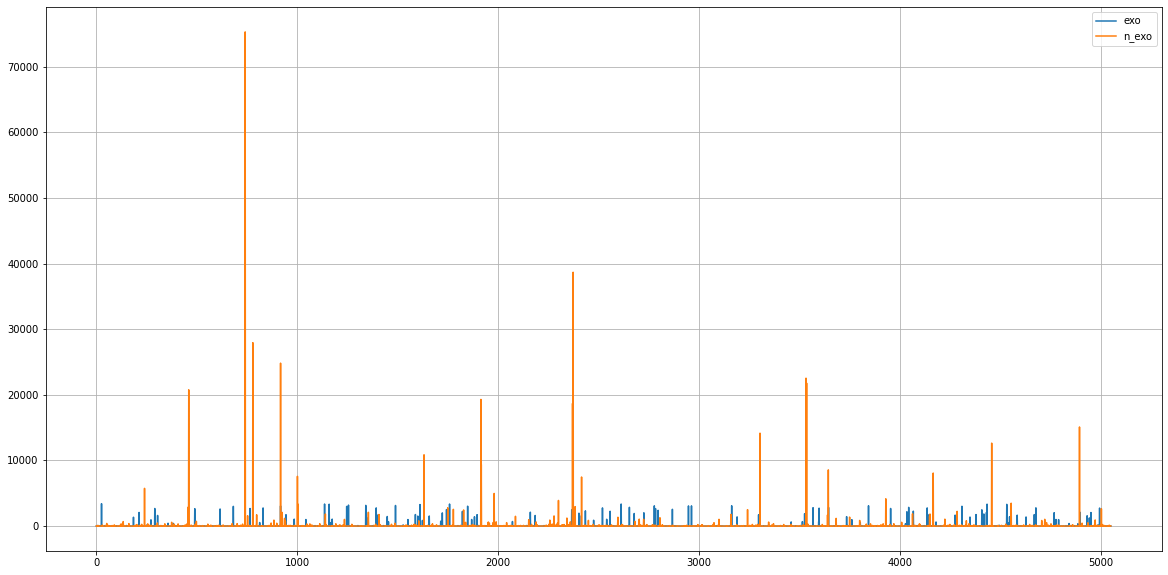

In [73]:
plt.figure(figsize = (20,10))
plt.plot(exo_max, label = 'exo')
plt.plot(n_exo_max, label = 'n_exo')
plt.legend()
plt.grid()

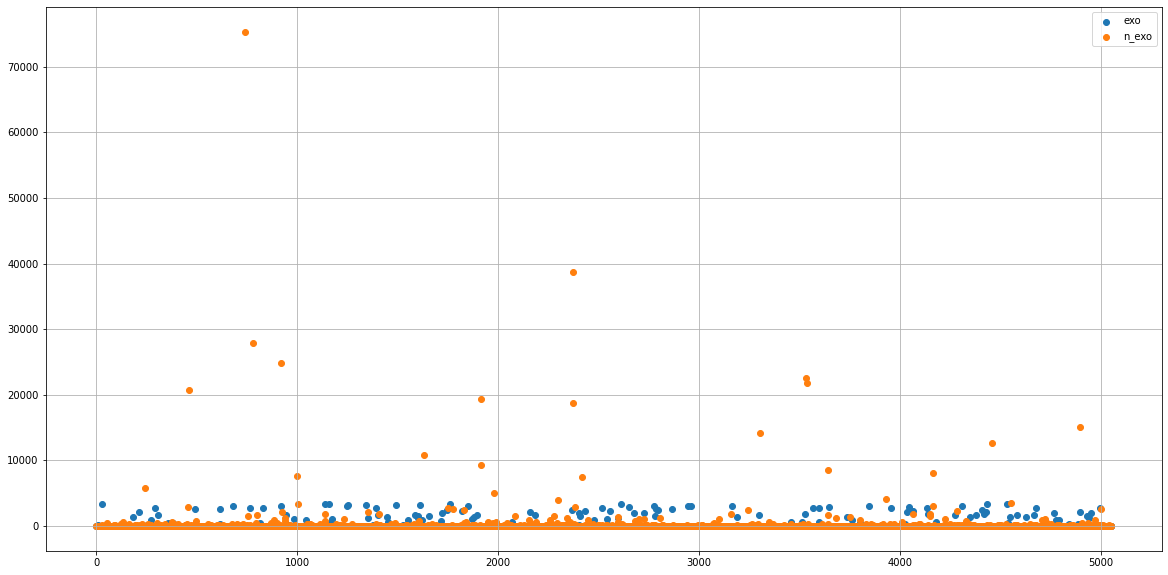

In [74]:
plt.figure(figsize = (20,10))
plt.scatter(list(range(0, len(exo_max))), exo_max, label = 'exo')
plt.scatter(list(range(0,len(n_exo_max))),n_exo_max, label = 'n_exo')
plt.legend()
plt.grid()

In [75]:
fft_data = np.zeros((X_new_sampled.shape[0], 1598))
for i, r in enumerate(X_new_sampled):
    fft = get_fft_spectrum(r)
    fft_data[i,:] = fft[1]

Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = 0.38720821
Iteration 4, loss = 0.33282037
Iteration 5, loss = 0.28612601
Iteration 6, loss = 0.23604929
Iteration 7, loss = 0.19298365
Iteration 8, loss = 0.15438490
Iteration 9, loss = 0.12433903
Iteration 10, loss = 0.10354699
Iteration 11, loss = inf
Iteration 12, loss = 0.11611254
Iteration 13, loss = 0.07445611
Iteration 14, loss = 0.06362047
Iteration 15, loss = 0.05542865
Iteration 16, loss = 0.04901306
Iteration 17, loss = 0.04317444
Iteration 18, loss = 0.03833069
Iteration 19, loss = 0.05020962
Iteration 20, loss = 0.04064130
Iteration 21, loss = 0.02953435
Iteration 22, loss = 0.02622012
Iteration 23, loss = 0.02388678
Iteration 24, loss = 0.02178767
Iteration 25, loss = 0.01991964
Iteration 26, loss = 0.01830127
Iteration 27, loss = 0.01692080
Iteration 28, loss = 0.01588898
Iteration 29, loss = 0.01449508
Iteration 30, loss = 0.01341358
Iteration 31, loss = 0.01253064
Iteration 32, loss = 0.01168926
Iterat

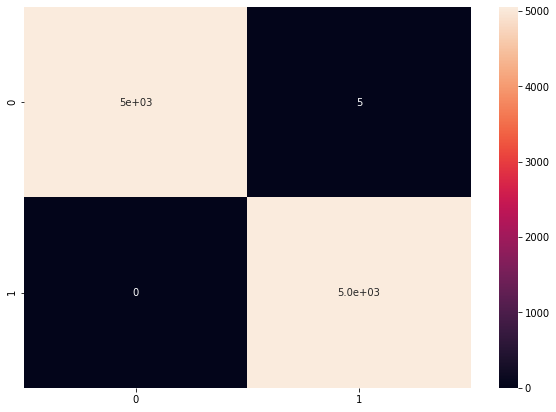

In [76]:
clf = MLPClassifier(random_state=1, max_iter=600, verbose = 3).fit(fft_data, y_sampled)


train_preds = clf.predict(fft_data)
print(classification_report(train_preds, y_sampled))

from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

plt.figure(figsize = (10,7))
cm = confusion_matrix(y_sampled, train_preds)
sn.heatmap(cm, annot=True)

In [77]:
X_test_scaled = np.zeros((X_new_test.shape[0], 1598))

for i, r in enumerate(X_new_test):
    fft = get_fft_spectrum(r)
    X_test_scaled[i,:] = fft[1]

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       565
           2       0.60      0.60      0.60         5

    accuracy                           0.99       570
   macro avg       0.80      0.80      0.80       570
weighted avg       0.99      0.99      0.99       570



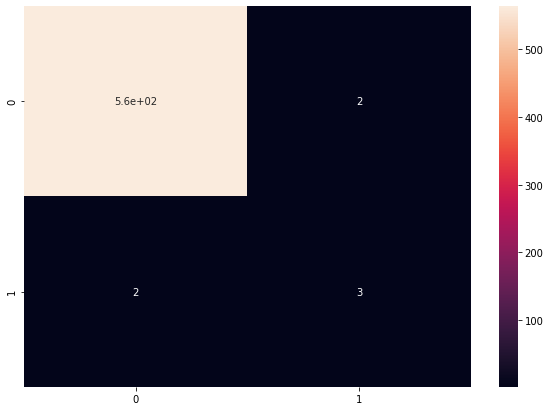

In [78]:
test_preds = clf.predict(X_test_scaled)
print(classification_report(test_preds, y_test))

from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

plt.figure(figsize = (10,7))
cm = confusion_matrix(y_test, test_preds)
sn.heatmap(cm, annot=True)

Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = 0.38720821
Iteration 4, loss = 0.33282037
Iteration 5, loss = 0.28612601
Iteration 6, loss = 0.23604929
Iteration 7, loss = 0.19298365
Iteration 8, loss = 0.15438490
Iteration 9, loss = 0.12433903
Iteration 10, loss = 0.10354699
Iteration 11, loss = inf
Iteration 12, loss = 0.11611254
Iteration 13, loss = 0.07445611
Iteration 14, loss = 0.06362047
Iteration 15, loss = 0.05542865
Iteration 16, loss = 0.04901306
Iteration 17, loss = 0.04317444
Iteration 18, loss = 0.03833069
Iteration 19, loss = 0.05020962
Iteration 20, loss = 0.04064130
Iteration 21, loss = 0.02953435
Iteration 22, loss = 0.02622012
Iteration 23, loss = 0.02388678
Iteration 24, loss = 0.02178767
Iteration 25, loss = 0.01991964
Iteration 26, loss = 0.01830127
Iteration 27, loss = 0.01692080
Iteration 28, loss = 0.01588898
Iteration 29, loss = 0.01449508
Iteration 30, loss = 0.01341358
Iteration 31, loss = 0.01253064
Iteration 32, loss = 0.01168926
Iterat

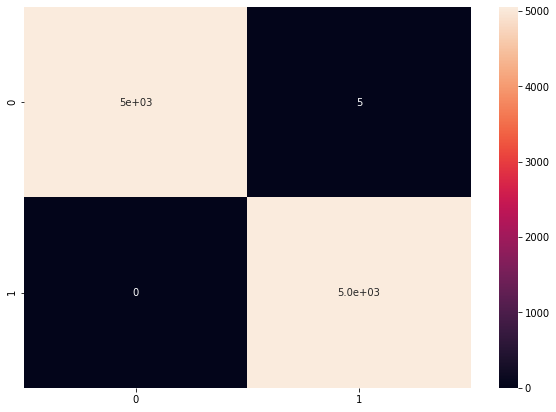

In [79]:
clf = MLPClassifier(random_state=1, max_iter=800, verbose = 3, tol =0.0000001).fit(fft_data, y_sampled)


train_preds = clf.predict(fft_data)
print(classification_report(train_preds, y_sampled))

from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

plt.figure(figsize = (10,7))
cm = confusion_matrix(y_sampled, train_preds)
sn.heatmap(cm, annot=True)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       565
           2       0.60      0.60      0.60         5

    accuracy                           0.99       570
   macro avg       0.80      0.80      0.80       570
weighted avg       0.99      0.99      0.99       570



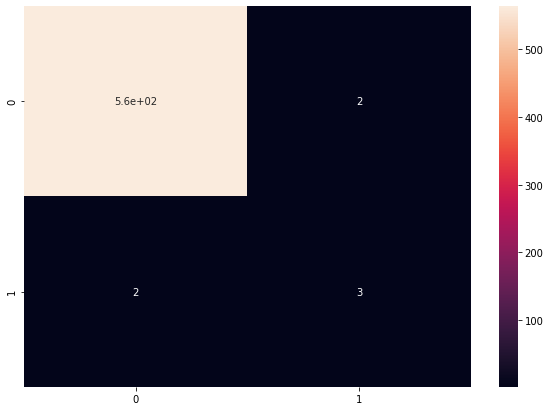

In [80]:
test_preds = clf.predict(X_test_scaled)
print(classification_report(test_preds, y_test))

from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

plt.figure(figsize = (10,7))
plt.xlabel('Predicted')
plt.ylabel('Actual')
cm = confusion_matrix(y_test, test_preds)
sn.heatmap(cm, annot=True)
plt.show()

In [81]:
X_new_test.shape

(570, 3197)

## NEW PROCESS: NEURAL NETWORK AND PROCESSING

In [82]:
## dataset process for NN



train = pd.read_csv('gdrive/My Drive/exoTrain.csv')
test = pd.read_csv('gdrive/My Drive/exoTest.csv')


In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.signal
from scipy.signal import savgol_filter
from  scipy import ndimage
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, normalize 
from scipy.ndimage.filters import uniform_filter1d
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from keras.optimizers import Adam, SGD
from keras import metrics, regularizers
from keras.callbacks import EarlyStopping
from keras import backend as K
import keras
import seaborn as sn
import math
import timeit
import tensorflow as tf

In [84]:
y_train = train.LABEL
X_train = train.drop('LABEL',axis=1)
y_test = test.LABEL
X_test = test.drop('LABEL',axis=1)

In [85]:
def reduce_upper_outliers(df,reduce = 0.01, half_width=4):
    length = len(df.iloc[0,:])
    remove = int(length*reduce)
    for i in df.index.values:
        values = df.loc[i,:]
        sorted_values = values.sort_values(ascending = False)
        for j in range(remove): 
            idx = sorted_values.index[j]
            new_val = 0
            count = 0
            idx_num = int(idx[5:])
            for k in range(2*half_width+1):
                idx2 = idx_num + k - half_width
                if idx2 <1 or idx2 >= length or idx_num == idx2:
                    continue
                new_val += values['FLUX.'+str(idx2)]

                count += 1
            new_val /= count 
            if new_val < values[idx]:
                df.at[i,idx] = new_val
    return df
def iterar_ruo(df, n=3):
    for i in range(n): 
        df2 = reduce_upper_outliers(df)
    return df2
def fourier_transform(df):
    df_fft = np.abs(np.fft.fft(df, axis=1))
    return df_fft
def apply_filter(df):
    filt = ndimage.filters.gaussian_filter(df, sigma=10)
    return filt
def apply_normalization(df_train, df_test):
    norm_train = normalize(df_train)
    norm_test = normalize(df_test)

    return pd.DataFrame(norm_train), pd.DataFrame(norm_test)
def apply_standarization(df_train, df_test):
    scaler = StandardScaler()
    norm_train = scaler.fit_transform(df_train)
    norm_test = scaler.transform(df_test)
    
    norm_train = pd.DataFrame(norm_train)
    norm_test = pd.DataFrame(norm_test)
    return norm_train, norm_test

In [86]:
X_train = iterar_ruo(X_train)
X_test = iterar_ruo(X_test)

fouriertrain = fourier_transform(X_train)
fouriertest = fourier_transform(X_test)

filtertrain = apply_filter(fouriertrain)
filtertest = apply_filter(fouriertest)

norm_train, norm_test  = apply_normalization(filtertrain, filtertest)

stand_train, stand_test = apply_standarization(norm_train, norm_test)


In [87]:
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter

X_total = stand_train.copy()
os =  SMOTE(sampling_strategy='minority')
final_train_x, final_train_y = os.fit_sample(X_total, y_train)

print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution labels after resampling {}".format(Counter(final_train_y)))


Distribution before resampling Counter({1: 5050, 2: 37})
Distribution labels after resampling Counter({2: 5050, 1: 5050})


In [88]:
upsampling.shape

NameError: ignored

In [89]:
labels = np.zeros((final_train_y.shape[0], 2))
labels[np.arange(final_train_y.size),final_train_y-1] = 1

In [103]:
def create_model(X_samp, activation='relu', learn_rate=0.01):
    model = Sequential()
    model.add(Conv1D(filters = 16, input_shape = (X_samp.shape[1],1), kernel_size=(3), activation = activation, kernel_regularizer='l2', padding='same'))
    model.add(MaxPooling1D(pool_size = 2, strides = 2))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(32, activation = activation, kernel_regularizer='l2'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation = "sigmoid", kernel_regularizer='l2'))
    
    optimizer = Adam(lr=learn_rate)
    #Adam is a optimized version of a SGD (Stochastic Gradient Descendant) optimizer.
    model.compile(optimizer=optimizer, loss='binary_crossentropy')
    #binary_crossentropy is the go-to loss function for classification tasks, either balanced or imbalanced. 
    #It is the first choice when no preference is built from domain knowledge yet.
    return model

In [105]:
EPOCHS = 50
VAL_SPLIT = 0.1
BATCH_SIZE = 120
early_stop = EarlyStopping(monitor=['val_loss', 'accuracy','val_accuracy'])

In [106]:
final_train = np.expand_dims(final_train_x,axis=2)
final_test = np.expand_dims(stand_test,axis=2)


In [107]:
final_train.shape, labels.shape

((10100, 3197, 1), (10100, 2))

In [108]:
model = create_model(final_train)
start_time_train = timeit.default_timer()
baseline_history= model.fit(final_train, labels, validation_split = VAL_SPLIT, epochs=EPOCHS, batch_size=BATCH_SIZE, shuffle=True)
upsampling_elapsed = timeit.default_timer() - start_time_train
print('Training time: ' + str(upsampling_elapsed))

Epoch 1/50
76/76 [==============================] - 13s 155ms/step - loss: 1.4851 - val_loss: 0.2529
Epoch 2/50
76/76 [==============================] - 12s 153ms/step - loss: 0.2248 - val_loss: 0.1545
Epoch 3/50
76/76 [==============================] - 12s 152ms/step - loss: 0.2038 - val_loss: 0.2154
Epoch 4/50
76/76 [==============================] - 12s 152ms/step - loss: 0.2137 - val_loss: 0.2414
Epoch 5/50
76/76 [==============================] - 12s 152ms/step - loss: 0.2475 - val_loss: 0.1506
Epoch 6/50
76/76 [==============================] - 12s 152ms/step - loss: 0.2278 - val_loss: 0.1868
Epoch 7/50
76/76 [==============================] - 12s 153ms/step - loss: 0.2021 - val_loss: 0.1854
Epoch 8/50
76/76 [==============================] - 12s 154ms/step - loss: 0.1928 - val_loss: 0.1403
Epoch 9/50
76/76 [==============================] - 12s 152ms/step - loss: 0.2352 - val_loss: 0.2228
Epoch 10/50
76/76 [==============================] - 12s 152ms/step - loss: 0.2361 - val_lo

In [109]:
train_predictions = model.predict(final_train)
train_preds = np.argmax(train_predictions, axis=1)

In [110]:
final_train_x.shape

(10100, 3197)

In [111]:
y_train = np.argmax(labels, axis =1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5037
           1       1.00      1.00      1.00      5063

    accuracy                           1.00     10100
   macro avg       1.00      1.00      1.00     10100
weighted avg       1.00      1.00      1.00     10100



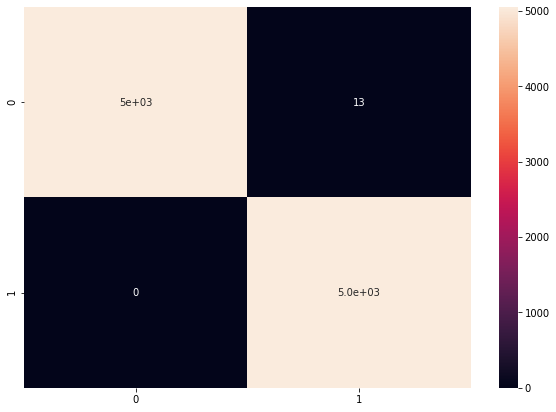

In [112]:
print(classification_report(train_preds, y_train))

from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

plt.figure(figsize = (10,7))
plt.xlabel('Predicted')
plt.ylabel('Actual')
cm = confusion_matrix(y_train, train_preds)
sn.heatmap(cm, annot=True)
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       566
           1       0.80      1.00      0.89         4

    accuracy                           1.00       570
   macro avg       0.90      1.00      0.94       570
weighted avg       1.00      1.00      1.00       570



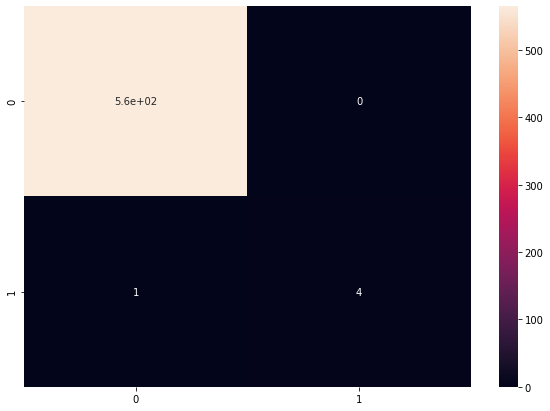

In [113]:
test_predictions = model.predict_classes(final_test)

print(classification_report(test_predictions, y_test-1))

from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

plt.figure(figsize = (10,7))
plt.xlabel('Predicted')
plt.ylabel('Actual')
cm = confusion_matrix(y_test-1, test_predictions)
sn.heatmap(cm, annot=True)
plt.show()

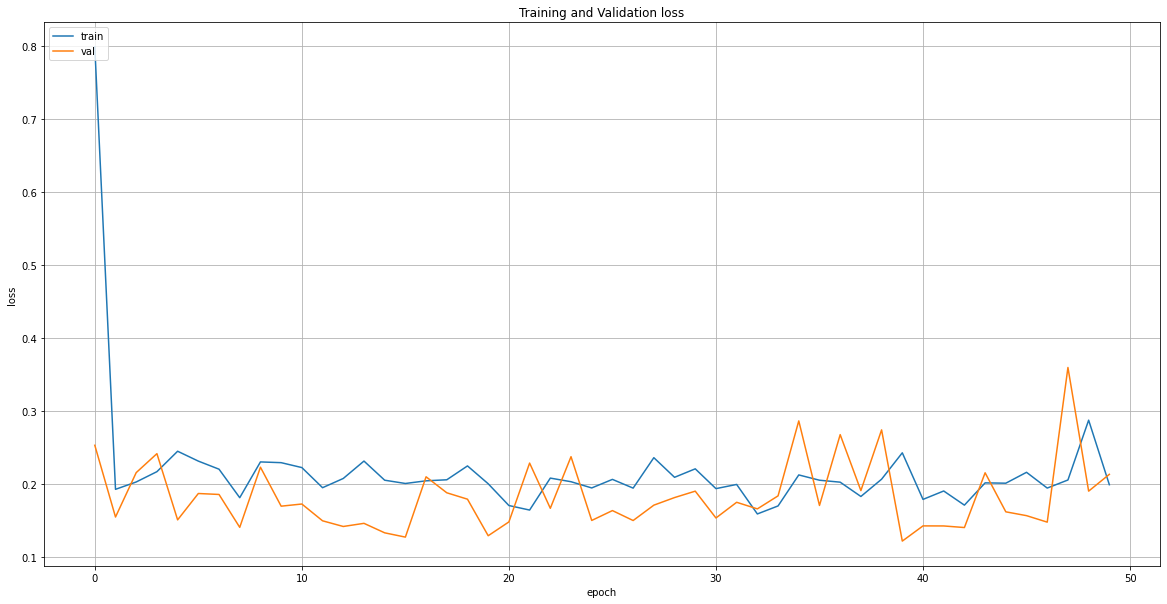

In [114]:
plt.figure(figsize = (20,10))
plt.plot(baseline_history.history['loss'])
plt.plot(baseline_history.history['val_loss'])
plt.title('Training and Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()


In [115]:
# testing

def reduce_upper_outliers(df,reduce = 0.01, half_width=4):
    length = df.shape[0]
    remove = int(length*reduce)
    for idx in sorted_test.index[:remove]:
      new = 0
      idx_num = int(idx[5:])
      for k in range(idx_num-4, idx_num+5):
        print(k, test['FLUX.'+str(k)])
        new +=test['FLUX.'+str(k)]
    new/=9
    if new_val < values[idx]: # just in case there's a few persistently high adjacent values
        df.set_value(i,idx,new_val)
    return df
def iterar_ruo(df, n=3):
    for i in range(n): 
        df2 = reduce_upper_outliers(df)
    return df2

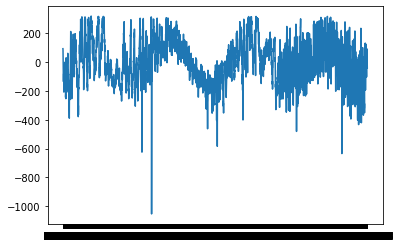

In [117]:
test = X_train.iloc[0]
plt.plot(test)
plt.show()


In [146]:
length = len(test)
remove = int(length*0.01)
sorted_test = test.sort_values(ascending = False)
for j in range(remove): 
    idx = sorted_test.index[j]
    new_val = 0
    count = 0
    idx_num = int(idx[5:])
    for k in range(2*4+1):
        idx2 = idx_num + k - 4
        print(idx2, test['FLUX.'+str(idx2)])
        if idx2 <1 or idx2 >= length or idx_num == idx2:
            continue
        new_val += test['FLUX.'+str(idx2)]
        count += 1
    print(new_val)
    new_val /= count 
    break

294 297.99766744613646
295 300.82361987829205
296 318.17979675292963
297 315.67761718749995
298 319.20343750000006
299 303.70727134704583
300 292.2
301 267.33
302 269.71
2365.625972611904


In [147]:
for idx in sorted_test.index[:remove]:
  new = 0
  idx_num = int(idx[5:])
  for k in range(idx_num-4, idx_num+5):
    print(k, test['FLUX.'+str(k)])
    new +=test['FLUX.'+str(k)]
  new/=9
  break

294 297.99766744613646
295 300.82361987829205
296 318.17979675292963
297 315.67761718749995
298 319.20343750000006
299 303.70727134704583
300 292.2
301 267.33
302 269.71
